## Package Load

In [1]:
from module import animeGAN2, model_rs50, keyword, orb_knn
from module import main_option, option_1, option_2

import PIL
from PIL import Image
from keras.preprocessing import image as keras_image

from tqdm.notebook import tqdm

import pandas as pd
import cv2
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

2022-07-31 22:36:57.473530: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-31 22:36:57.475737: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-31 22:36:57.478711: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


## Data & model Load

In [2]:
actor_keyword_df = pd.read_excel('./text_data/Actor_keywords_test.xlsx')
webtoon_keyword_df = pd.read_excel('./text_data/Webtoon_keywords_test.xlsx')
keyword_score_table = pd.read_excel('./text_data/Keyword_score_table_test.xlsx')

model_gan = animeGAN2.AnimeGAN()
model_RS = model_rs50.RN50()
model_key = keyword.Keyword('./model/fasttext.model')
model_ORB = orb_knn.OrbKNN()

option_1_func = option_1.User(webtoon_keyword_df, actor_keyword_df, keyword_score_table, model_ORB, model_RS)
option_2_func = option_2.User(webtoon_keyword_df, model_ORB, model_key, model_RS, model_gan)
main_option_func = main_option.User(model_gan, model_RS, model_key, model_ORB)

Using cache found in /home/lab22/.cache/torch/hub/bryandlee_animegan2-pytorch_main
Using cache found in /home/lab22/.cache/torch/hub/bryandlee_animegan2-pytorch_main
2022-07-31 22:37:17.972519: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-31 22:37:17.972970: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-31 22:37:17.977119: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-31 22:37:17.979683

## Run Function

In [3]:
def terminate():
    global RUN
    RUN = False

## Run

1. 사용자의 옵션 선택
- option 1 : 웹툰과 등장인물을 선택하여 데이터베이스에 존재하는 배우들과 비교하여 배우 추천
- option 2 : 사용자가 사용자의 사진을 upload하여 선택한 웹툰의 등장인물과 비교

In [4]:
RUN = True
option_list = [main_option_func.run, option_1_func.recommend_actor, option_2_func.run_option_2, terminate]


========== 웹툰 배우 추천 시스템 ==========
1. 사용자 지정
2. 배우 추천
3. 사용자 입력
4. 종료

>>> 번호를 입력하세요 : 1

=============== 웹툰 등장인물 사진 업로드 ===============
* 사진은 jpg 형식으로 올려주세요.
>>> 입력(현재는 경로로 대체) : ./웹툰_성주신


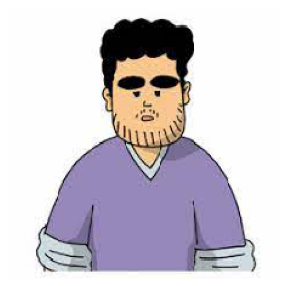


================= 등장인물 정보 입력 =================
* 키워드는 반드시 하나이상 입력해야한다.
* 키워드를 여러개 입력할 때, 구분자는 ", "이다.
* 예시) 바보같다, 사랑스럽다, 둔하다

>>> 이름 입력 : 성주신
>>> 키워드 입력(구분자는 ",") : 듬직하다, 강하다

=============== 배우 사진 업로드 ===============
* 사진은 jpg 형식으로 올려주세요.
>>> 입력(현재는 경로로 대체) : 마동석


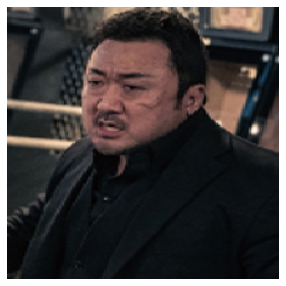


================= 배우 정보 입력 =================
* 키워드는 반드시 하나이상 입력해야한다.
* 키워드를 여러개 입력할 때, 구분자는 ", "이다.
* 예시) 바보같다, 사랑스럽다, 둔하다

>>> 이름 입력 : 마동석
>>> 키워드 입력(구분자는 ",") : 사납다, 듬직하다
마동석 배우는 한류스타입니다.
가중치가 부여됩니다.
마동석 배우는 드라마 스타가 아닙니다.
가중치가 부여되지 않습니다.


2022-07-31 22:38:42.484218: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8201
2022-07-31 22:38:42.504070: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-07-31 22:38:45.941396: W tensorflow/core/common_runtime/bfc_allocator.cc:343] Garbage collection: deallocate free memory regions (i.e., allocations) so that we can re-allocate a larger region to avoid OOM due to memory fragmentation. If you see this message frequently, you are running near the threshold of the available device memory and re-allocation may incur great performance overhead. You may try smaller batch sizes to observe the performance impact. Set TF_ENABLE_GPU_GARBAGE_COLLECTION=false if you'd like to disable this feature.
2022-07-31 22:38:45.983253: I tensorflow/stream_executor/cuda/cuda_driver.cc:739] failed to allocate 1.51G (1621622784 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2022-07-31 22:38:46.154361: 

=================== << 결과 >> ===================


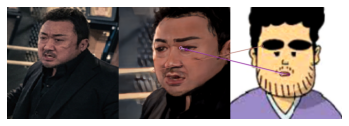

배우 이름: 마동석
배우 키워드 : 사납다, 듬직하다
등장인물 이름 : 성주신
등장인물 키워드 : 듬직하다, 강하다

키워드 유사도 : 77.52
이미지 유사도 : 64.21
전체 점수 : 73.56

========== 웹툰 배우 추천 시스템 ==========
1. 사용자 지정
2. 배우 추천
3. 사용자 입력
4. 종료

>>> 번호를 입력하세요 : 2

========================= 웹툰 제목 선택 =========================
1. 폭풍의전학생           2. 모태솔로수용소          3. 죽음에관하여           
4. 심연의하늘            5. 웃지않는개그반          6. 간 떨어지는 동거        
7. 상중하              8. 싸우자귀신아           9. 요리GO             
10. 사이드킥            11. 낮에 뜨는 달         12. 이제 곧 죽습니다       
13. 구구까까            14. 완벽한 허니문         15. 다이스(DICE)       
16. 엽총소년            17. 한림체육관           18. 입시명문사립 정글고등학교   
19. 투명한 동거          20. 컨트롤제트           21. 미래소녀            
22. 윈터우즈            23. Ho!             24. 미라클! 용사님        
25. 목욕의 신           26. 열렙전사            27. 손의 흔적           
28. 핑크레이디           29. 유미의 세포들         30. 스피릿 핑거스         
31. 하이브 1~2         32. 오!주예수여          33. 악의는 없다          
34. 공복의 저녁식사        35. 더 복서            36. 후레자식            
37. 

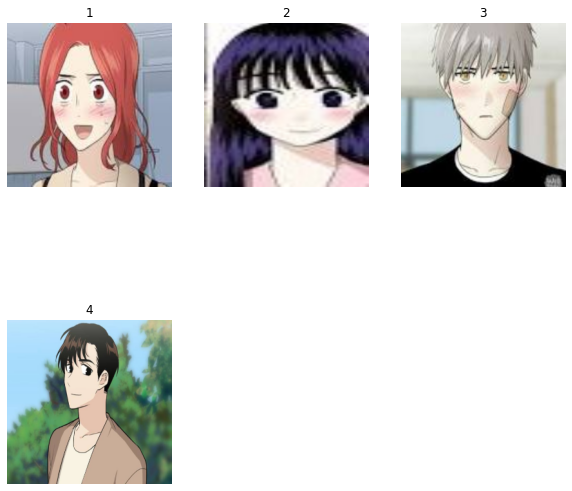



>>> 번호를 입력하세요 : 1

============== 나이 범위 지정 ==============
 * 숫자로만 입력하세요.

>>> 최소 나이 입력: 10
>>> 최대 나이 입력: 30

============= 추천받을 배우의 수 지정 =============
* 필터링된 배우의 최대 수 : 161

>>> 추천받을 배우의 수 : 10


  0%|          | 0/161 [00:00<?, ?it/s]

=================== << 결과 >> ===================
* 점수 산정 : 키워드 30.0%, 이미지 70.0%


  0%|          | 0/10 [00:00<?, ?it/s]

배우 이름 : 강예서
배우 나이 : 17
배우 성별 : 여


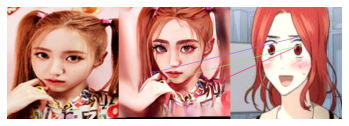

Character Keywords : 부러워하다, 반하다, 피곤하다, 의하다, 인하다
Actor keywords : 성숙하다, 풍부하다, 엄청나다, 성공하다, 정확하다

Keyword Similarity     : 93.9%
Image Similarity       : 83.88%
** Total Similarity ** : 86.89%
배우 이름 : Charmy
배우 나이 : 19
배우 성별 : 여


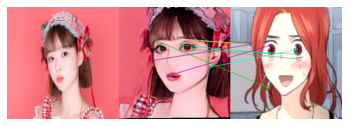

Character Keywords : 부러워하다, 반하다, 피곤하다, 의하다, 인하다
Actor keywords : 중요하다, 편하다, 엄청나다, 활발하다, 변하다

Keyword Similarity     : 92.12%
Image Similarity       : 84.62%
** Total Similarity ** : 86.87%
배우 이름 : 장해금
배우 나이 : 16
배우 성별 : 여


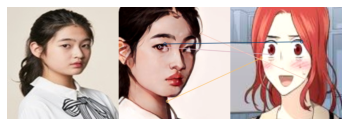

Character Keywords : 부러워하다, 반하다, 피곤하다, 의하다, 인하다
Actor keywords : 불량하다, 행복하다, 치열하다

Keyword Similarity     : 93.81%
Image Similarity       : 82.05%
** Total Similarity ** : 85.58%
배우 이름 : 안소희
배우 나이 : 30
배우 성별 : 여


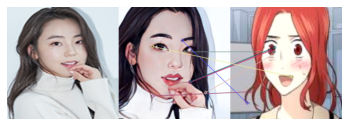

Character Keywords : 부러워하다, 반하다, 피곤하다, 의하다, 인하다
Actor keywords : 실패하다, 독특하다, 풋풋하다, 어리둥절하다, 완전하다

Keyword Similarity     : 95.56%
Image Similarity       : 80.69%
** Total Similarity ** : 85.15%
배우 이름 : 김민주
배우 나이 : 21
배우 성별 : 여


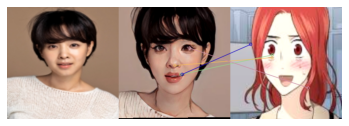

Character Keywords : 부러워하다, 반하다, 피곤하다, 의하다, 인하다
Actor keywords : 위대하다, 유일하다, 힘들다, 그러하다

Keyword Similarity     : 91.31%
Image Similarity       : 80.9%
** Total Similarity ** : 84.03%
배우 이름 : 김남주
배우 나이 : 27
배우 성별 : 여


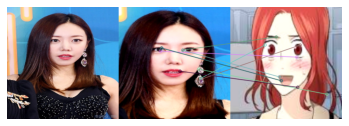

Character Keywords : 부러워하다, 반하다, 피곤하다, 의하다, 인하다
Actor keywords : 짜릿하다, 너무하다, 단단하다, 화끈하다, 아슬아슬하다

Keyword Similarity     : 95.04%
Image Similarity       : 79.28%
** Total Similarity ** : 84.01%
배우 이름 : 박유나
배우 나이 : 25
배우 성별 : 여


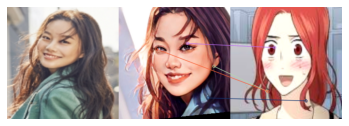

Character Keywords : 부러워하다, 반하다, 피곤하다, 의하다, 인하다
Actor keywords : 예쁘다, 알맞다, 유명하다, 중요하다, 화사하다

Keyword Similarity     : 79.12%
Image Similarity       : 85.74%
** Total Similarity ** : 83.75%
배우 이름 : 김희정
배우 나이 : 30
배우 성별 : 여


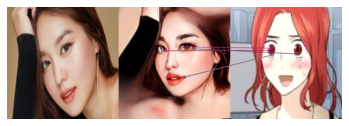

Character Keywords : 부러워하다, 반하다, 피곤하다, 의하다, 인하다
Actor keywords : 훌륭하다, 성장하다, 꾸준하다

Keyword Similarity     : 88.9%
Image Similarity       : 81.52%
** Total Similarity ** : 83.73%
배우 이름 : 한지현
배우 나이 : 26
배우 성별 : 여


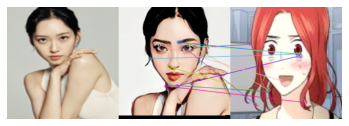

Character Keywords : 부러워하다, 반하다, 피곤하다, 의하다, 인하다
Actor keywords : 편하다, 오죽하다, 힘드다

Keyword Similarity     : 89.25%
Image Similarity       : 81.3%
** Total Similarity ** : 83.68%
배우 이름 : 채수빈
배우 나이 : 28
배우 성별 : 여


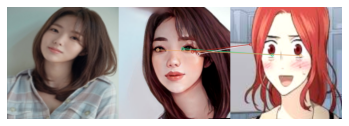

Character Keywords : 부러워하다, 반하다, 피곤하다, 의하다, 인하다
Actor keywords : 회복하다, 색다르다, 수상하다, 완벽하다, 활발하다

Keyword Similarity     : 90.21%
Image Similarity       : 80.81%
** Total Similarity ** : 83.63%

========== 웹툰 배우 추천 시스템 ==========
1. 사용자 지정
2. 배우 추천
3. 사용자 입력
4. 종료

>>> 번호를 입력하세요 : 3

========================= 웹툰 제목 선택 =========================
1. 폭풍의전학생           2. 모태솔로수용소          3. 죽음에관하여           
4. 심연의하늘            5. 웃지않는개그반          6. 간 떨어지는 동거        
7. 상중하              8. 싸우자귀신아           9. 요리GO             
10. 사이드킥            11. 낮에 뜨는 달         12. 이제 곧 죽습니다       
13. 구구까까            14. 완벽한 허니문         15. 다이스(DICE)       
16. 엽총소년            17. 한림체육관           18. 입시명문사립 정글고등학교   
19. 투명한 동거          20. 컨트롤제트           21. 미래소녀            
22. 윈터우즈            23. Ho!             24. 미라클! 용사님        
25. 목욕의 신           26. 열렙전사            27. 손의 흔적           
28. 핑크레이디           29. 유미의 세포들         30. 스피릿 핑거스         
31. 하이브 1~2         32. 오!주예수여          33. 악의는

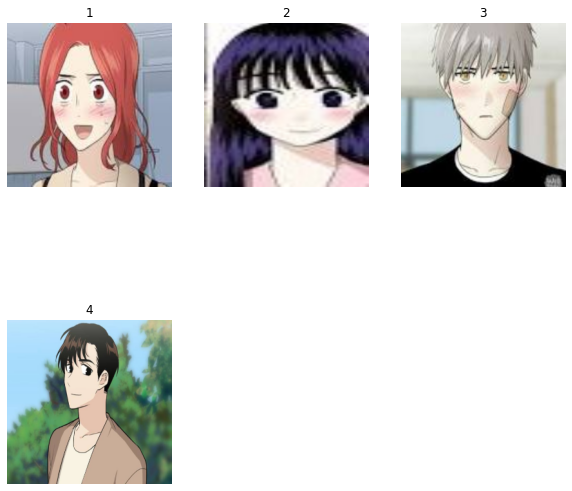



>>> 번호를 입력하세요 : 3

============= 선택된 등장인물 =============


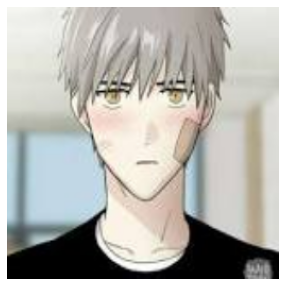


=============== 사진 업로드 ===============
* 사진은 jpg 형식으로 올려주세요.
>>> 입력(현재는 경로로 대체) : ./금


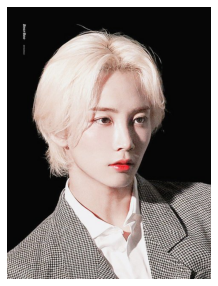


================= 키워드 입력 =================
* 키워드는 반드시 하나이상 입력해야한다.
* 키워드를 여러개 입력할 때, 구분자는 ", "이다.
* 예시) 바보같다, 사랑스럽다, 둔하다

>>> 입력(구분자는 ",") : 잘생겼다, 하얗다

=================== << 결과 >> ===================


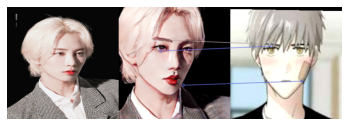

Character keywords : 미안하다, 부족하다, 상당하다, 수상하다, 의하다
User keywords : 잘생겼다, 하얗다

Keyword Similarity : 11.57%
Image Similarity : 81.26%

Total Similarity : 60.35%

========== 웹툰 배우 추천 시스템 ==========
1. 사용자 지정
2. 배우 추천
3. 사용자 입력
4. 종료

>>> 번호를 입력하세요 : 4
시스템이 종료됩니다.


In [5]:
while RUN:
    select_option = int(input(f'''
{'=' * 10} 웹툰 배우 추천 시스템 {'=' * 10}
1. 사용자 지정
2. 배우 추천
3. 사용자 입력
4. 종료
{'=' * 43}

>>> 번호를 입력하세요 : '''))
    
    option_list[select_option - 1]()
else:
    print("시스템이 종료됩니다.")
    RUN = True

- 보완점
    1. 이미지 매칭선을 조정필요(최종발표할때)
    2. 사용자 이미지 변화과정 보여주고 괜찮으면 사용.
    3. 배우, 웹툰 키워드 최소 5개로 추가하기.